Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 11 - Free vibration of multi degree of freedom systems

[1.   Natural vibration modes and frequency](#section_1)  
[1.1. The general solution for free vibration](#section_11)  
[1.2. Natural vibration modes and frequencies](#section_12)  
[1.3. Orthogonality of vibration modes](#section_13)  
[2.   Examples of modal properties assessment](#section_2)  
[2.1. Example 1: steel plane truss](#section_21)  
[2.2. Example 2: beam element](#section_22)  
[2.3. Example 3: experimental 3-dof model](#section_23)  
[3.   Structural response to initial conditions](#section_3)  
[4.   Assignment](#section_4)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.linalg as sc

from MRPy import MRPy

# Load matrices generated in Class 10 (that notebook must be run firstly!)

with open('resources/data/sample_KM.pk', 'rb') as target:
    K1, M1, K2, M2, K3, M3 = pk.load(target)


## 1. Natural vibration modes and frequencies <a name="section_1"></a> 

### 1.1. The general solution for free vibration <a name="section_11"></a> 

Once the stiffness and mass matrices are defined for a given structure, the
undamped equilibrium matrix equation results to be a set of coupled equilibrium
equations, each one for one of the degrees of freedom. In matrix forms it reads:

$$ \mathbf{M} \, \ddot{\vec{u}} + \mathbf{K} \, \vec{u} = \vec{F}(t) $$ 

where $\vec{F}(t)$ is the (time dependent) external loads vector.
In case of free vibration we have:

$$ \mathbf{M} \, \ddot{\vec{u}} + \mathbf{K} \, \vec{u} = \vec{0} $$ 

Let us now assume that there is a solution $\vec{u}_k(t)$ such that:

$$ \vec{u}_k(t) = u_k(t) \, \vec{\varphi}_k $$

where $\vec{\varphi}_k$ is not time dependent. This assumption may be
understood as a separation of time and space dependence of $\vec{u}_k(t)$.
Now the acceleration vector results to be:

$$ \ddot{\vec{u}}_k(t) = \ddot{u}_k(t)  \, \vec{\varphi}_k $$

and the free vibration equation becomes:

$$ \ddot{u}_k(t) \, \mathbf{M} \, \vec{\varphi}_k  + 
          u_k(t) \, \mathbf{K} \, \vec{\varphi}_k  = \vec{0} $$ 

Premultiplying this equation by $\mathbf{K}^{-1}$ and dividing by $u_k(t)$ results:

$$ \frac{\ddot{u}_k(t)}{u_k(t)} \, \mathbf{D} \, \vec{\varphi}_k  + 
         \mathbf{I} \vec{\varphi}_k  = \vec{0} $$ 

where $\mathbf{I}$ is the identity matrix and $\mathbf{D} = \mathbf{K}^{-1} \, 
\mathbf{M}$ is called the _system dynamic matrix_.
Recalling that $\vec{\varphi}_k$ is not time dependent implies that the equation
above is only valid if the coefficient of matrix $\mathbf{D}$ is constant in time.
We denote this constant quotient as $-\omega_k^2$ and the condition becomes:

$$ \ddot{u}_k(t) + \omega_k^2 u_k(t) = 0 $$

The solution for this equation has the general form:

$$ u_k(t) = u_{k0} \sin \left( \omega_k t + \theta_k \right) $$

which is the same form found for a single degree of freedom system.
However, the time function $u_k(t)$ is only part of the solution for $\vec{u}(t)$,
corresponding to its time dependent amplitude. 
There is still the need of finding the time independent vector, $\vec{\varphi}_k$,
and the free vibration frequency, $\omega_k$.


### 1.2. Natural vibration modes and frequencies <a name="section_12"></a> 

The general amplitude solution above implies that the acceleration vector is:

$$ \ddot{\vec{u}}_k(t) = -\omega_k^2 u_{k0} 
   \sin \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

Replacing this result in the free vibration equation and simplifying gives:

$$ \mathbf{K} \, \vec{\varphi}_k = \omega_k^2 \, \mathbf{M} \, \vec{\varphi}_k  $$ 

or, alternativelly, with the dynamic matrix:

$$ \mathbf{D} \, \vec{\varphi}_k = \lambda_k \, \vec{\varphi}_k  $$ 

with $\lambda_k = 1\,/\,\omega_k^2$.
The two equations above represent an eigenvalue-eigenvector problem, which
has as many solutions as the matrices order, $N$, which is also the number
of system degrees of freedom. 
Each solution is a pair $\left( \omega_k, \vec{\varphi}_k \right)$ or, 
alternatively, $\left( \lambda_k, \vec{\varphi}_k \right)$ if the 
dynamic matrix is used.

The eigenvalues $\omega_k$ are called the _natural vibration frequencies_
of the strutural system, while the eigenvectors $\vec{\varphi}_k$ are
called the _vibration modes_, or _modal shapes_. 
It is very important to keep in mind that _the modal shapes have 
no prespecified scale_, what means that they can be multiplied by
any scale factor, $\alpha$, and still remain solutions for the eigenproblem:

$$ \mathbf{K} \, (\alpha \vec{\varphi}_k) = 
   \omega_k^2 \, \mathbf{M} \, (\alpha \vec{\varphi}_k) $$ 

Numerical algorithms for solving this eigenproblem are available in many
environments, including the best models of HP handheld calculators. 
In Python, they are available in ```scipy.linalg``` module and will be
used in [section 2](#section_2) for the three examples provided in the previous class.


### 1.3. Orthogonality of vibration modes <a name="section_13"></a> 

The eigenvectors $\vec{\varphi}_k$ presents the important property of _orthogonality_
with respect to the stiffness and to the mass matrix.
This is a direct consequence of their symmetry, as shown in the following.
Let us start by considering two vibration modes $i$ and $j$ that are solutions for
the eigenproblem:

\begin{align*}
\mathbf{M} \, \vec{\varphi}_i &= \lambda_i \mathbf{K} \, \vec{\varphi}_i \\
\mathbf{M} \, \vec{\varphi}_j &= \lambda_j \mathbf{K} \, \vec{\varphi}_j
\end{align*}

Transposing the equation for mode $i$ above and recognizing that 
$\mathbf{M} = \mathbf{M}^{\intercal}$ and $\mathbf{K} = \mathbf{K}^{\intercal}$ gives:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} 
 = \lambda_i \vec{\varphi}_i^{\intercal} \, \mathbf{K} $$

Now, postmultiplying by $\vec{\varphi}_j$ gives:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j
 = \lambda_i \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j $$

On the other hand, the eigenproblem for mode $j$ above can be premultiplied by 
$\vec{\varphi}_i^{\intercal}$ to give:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j
 = \lambda_j \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j $$

Subtracting this last equation from the previous one results in:

$$ (\lambda_i - \lambda_j) \, \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j = 0 $$

This condition can be satisfied if and only if:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j = 0,
   \hspace{1cm} {\rm for} \; i \neq j $$

Starting again this demonstration with the $j$ eigenproblem solution leads also to:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j = 0,
   \hspace{1cm} {\rm for} \;  i \neq j $$

These are the two orthogonality conditions for the eigenvectors $\vec{\varphi}_k$.
In the next class they will be used to decouple the matrix equilibrium equation 
into a set of scalar equations, one for each vibration mode.


## 2. Examples of modal properties assessment <a name="section_2"></a> 

In the following sections, each of the three examples presented in the
last class are subjected to a modal analysis and the corresponding solutions,
for both natural frequencies and associated vibration modes, are plotted
for visualization.

The eigenvalues and eigenvectors are solved with ```scipy``` function ```eig``` 
from module ```linalg```. We define a general function to return natural
vibration frequencies, and the associated vibration modes, in ascending order:


In [2]:
def vibration_modes(K, M):

# Uses scipy to solve the standard eigenvalue problem
    w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
    iw  = w2.argsort()
    w2  = w2[iw]
    Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
    wk  = np.sqrt(np.real(w2)) 
    fk  = wk/2/np.pi

    return fk, wk, Phi


### 2.1. Example 1: steel plane truss  <a name="section_21"></a> 

For the steel truss presented last class this is done as follows: 


In [3]:
fk1, wk1, Phi1 = vibration_modes(K1, M1)

print(fk1)


[ 3.93785233 13.28874904 23.0790977  32.38000947 36.76923945]


The script below shows the results as nodal displacements at the truss top.


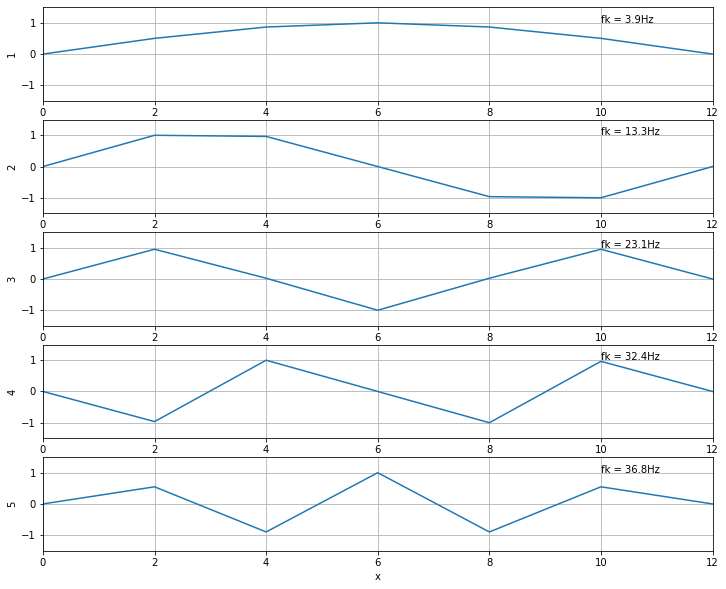

In [4]:
f1 = plt.figure(1, figsize=(12,10))
x  = np.arange(0, 14, 2)

for k in range(5):
    qk = np.zeros(7)
    qk[1:-1] = Phi1[:,k]
    qk /= np.max(np.abs(qk))   # adjust scale for unity amplitude
    
    plt.subplot(5,1,k+1)
    plt.plot(x, qk)
    
    plt.xlim( 0.0, 12.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


### 2.2. Example 2: beam element <a name="section_22"></a> 



The interpolation functions could not be dumped with ```pickle```, so we must re-create
them for visualizing the modal shapes:


In [5]:
# Beam length discretization
L   = 1

# Defining a list of lambda functions
phi = []
phi.append(lambda xi:  1 - 3*xi*xi + 2*xi*xi*xi)
phi.append(lambda xi:  L*(xi - 2*xi*xi + xi*xi*xi))
phi.append(lambda xi:  3*xi*xi - 2*xi*xi*xi)
phi.append(lambda xi:  L*(-xi*xi + xi*xi*xi ))


Furthermore, the stiffness matrix is not positive definite, for no 
boundary conditions have been applied so far (it is a bar "floating in space").
It is necessary to restrain at least two degrees of freedom to suppress a 
free body motion.
For instance, to model a cantilever beam we can restrain $u_1 = 0$ and $u_2 = 0$,
what implies that the first two rows and two columns of $\mathbf{K}$ and 
$\mathbf{M}$ can be removed:


In [6]:
K2 = K2[2:,2:]
M2 = M2[2:,2:]


Now the eigenvalues problem can be solved:

In [7]:
fk2, wk2, Phi2 = vibration_modes(K2, M2)


For the visualization below, the vibration modes are a linear combination of the 
interpolation functions (for the remaining degrees of freedom), each one multiplied 
by the resulting eingenvector coordinate.


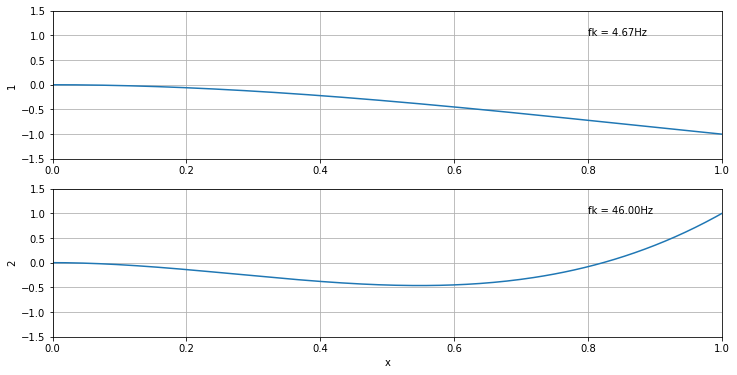

In [8]:
f2 = plt.figure(2, figsize=(12,6))
x  = np.linspace(0, 1, 200)

for k in range(2):
    qk = Phi2[:,k]
    px = np.zeros(x.shape)
    
    for km in range(2):
        px += qk[km]*phi[km+2](x)   # superpose interpolations
    
    px /= np.max(np.abs(px))        # adjust scale for unity amplitude
    plt.subplot(2,1,k+1)
    plt.plot(x, px)
   
    plt.xlim( 0.0, 1.0);
    plt.ylim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.grid(True)
    
    plt.text(0.8, 1.0, 'fk = {0:4.2f}Hz'.format(fk2[k]));

plt.xlabel('x');


### 2.3.Example 3: experimental 3-dof model  <a name="section_23"></a> 

For the experimental model we get:


In [9]:
fk3, wk3, Phi3 = vibration_modes(K3, M3)


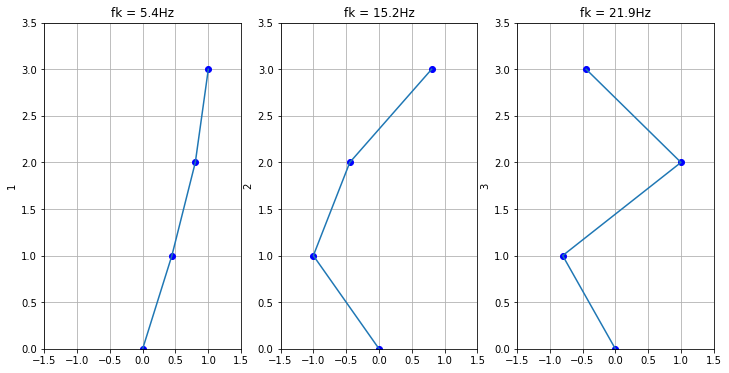

In [10]:
f3 = plt.figure(3, figsize=(12,6))
x  = np.arange(4)

for k in range(3):
    qk = np.zeros(4)
    qk[1:] = Phi3[::-1,k]
    qk /= np.max(np.abs(qk))   # adjust scale for unity amplitude
    
    plt.subplot(1,3,k+1)
    plt.plot(qk, x, 'bo')
    plt.plot(qk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 3.5);
    plt.title('fk = {0:3.1f}Hz'.format(fk3[k]));
    plt.grid(True)


<table align="left">
 <tr>
   <td align="left"><img src="images/model3dof_mode1.jpg" alt="3dof mode 1" width="240px"/></td>
   <td align="left"><img src="images/model3dof_mode2.jpg" alt="3dof mode 2" width="240px"/></td>
   <td align="left"><img src="images/model3dof_mode3.jpg" alt="3dof mode 3" width="240px"/></td>
 </tr>
 <tr>
   <td align="left">$f_1 =  5.4$Hz</td>
   <td align="left">$f_2 = 15.2$Hz</td>
   <td align="left">$f_3 = 22.9$Hz</td>
 </tr>
</table> 


## 3. Structural response to initial conditions <a name="section_3"></a> 

Let us recall the free vibration solution for mode $k$, previously stated:

$$ u_k(t) = u_{k0} \sin \left( \omega_k t + \theta_k \right)$$

Now, the complete solution will be a superposition of solutions for all modes:

$$ \vec{u}(t) = \mathbf{\Phi}\vec{u}_k(t) = \sum_{k = 1}^{N} u_k(t) \, \vec{\varphi}_k = 
   \sum_{k = 1}^{N} u_{k0} \sin \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

where $N$ is the number of degrees of freedom (length of 
vector $\vec{\varphi}_k$). Deriving the equation above with respect to 
time gives the corresponding instantaneous velocity:

$$ \dot{\vec{u}}(t) = \sum_{k = 1}^{N} u_{k0} \omega_k  
\cos \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

Now we provide the initial conditions $\vec{u}_0$ and $\vec{v}_0$ 
for time $t = 0$:

\begin{align*}
\vec{u}_0 = \vec{u}(0) &= \sum_{k = 1}^{N} u_{k0} \sin \left( \theta_k \right) \, \vec{\varphi}_k  \\
\vec{v}_0 = \dot{\vec{u}}(0) &= \sum_{k = 1}^{N} u_{k0} \omega_k \cos \left( \theta_k \right) \, \vec{\varphi}_k 
\end{align*}

To separate the conditions equation for each mode, we create the following
scalar quantities:

\begin{align*}
\vec{\varphi}_i^{\intercal}  \mathbf{M} \vec{u}_0 &= \vec{\varphi}_i^{\intercal}  \mathbf{M}
\sum_{k = 1}^{N} u_{k0} \sin \left( \theta_k \right) \, \vec{\varphi}_k  = 
u_{i0} \sin \left( \theta_i \right) \; \vec{\varphi}_i^{\intercal}  \mathbf{M} \vec{\varphi}_i \\
\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{v}_0 &=  \vec{\varphi}_i^{\intercal}  \mathbf{M}
\sum_{k = 1}^{N} u_{k0} \omega_k \cos \left( \theta_k \right) \, \vec{\varphi}_k  = u_{i0} \omega_i \cos \left( \theta_i \right) \, \vec{\varphi}_i^{\intercal}  \mathbf{M} \vec{\varphi}_i
\end{align*}

Dividing the two expressions above yields the phase angle of each modal
solution, $\theta_i$,

$$ \tan(\theta_i) = \omega_i \, \left( \frac{\vec{\varphi}_i^{\intercal}  \mathbf{M} \vec{u}_0}{\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{v}_0} \right) $$ 

which can be used to calculate the corresponding amplitudes $u_{i0}$:

$$ u_{i0} \sin \left( \theta_i \right) =  \left( \frac{\vec{\varphi}_i^{\intercal}  \mathbf{M} \vec{u}_0}{\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{\varphi}_i} \right) $$ 

We recall that the scalar quantities $\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{\varphi}_i$, in the equations
above, are the so-called modal masses, $M_i$. 
Furthermore, observe that special care must be taken for zero initial velocity, 
what gives infinity for $\tan(\theta_i)$ implying that $\theta_i = \pi/2$.

As an example, let us calculate the free vibration response of the 3-dof experimental model subjected to a 
small displacement of 5mm in the top mass only. We start by calculating the modal masses, $M_i$ and the 
scalar quantities $\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{u}_0$ and 
$\vec{\varphi}_i^{\intercal} \mathbf{M} \vec{v}_0$:


In [11]:
u0 = np.array([[0.005, 0.000, 0.000]]).T      # column vector with the initial displacements
v0 = np.array([[0.000, 0.000, 0.000]]).T      # column vector with the initial velocities

Mi   = np.dot(np.dot(Phi3.T, M3), Phi3)       # modal mass
Mi   = np.diag(Mi)

qMu0 = np.dot(np.dot(Phi3.T, M3), u0)
qMv0 = np.dot(np.dot(Phi3.T, M3), v0)


Then we calculate the free vibration properties $u_{i0}$ and $\theta_i$:


In [12]:
u0i =  np.zeros(3)
thi = (np.pi/2)*np.ones(3)  # if velocity is zero, we get arctan of infinity

for k in range(3):
    if (qMv0[k] != 0.): thi[k] = np.atan(wk[k]*qMu0[k]/qMv0[k])
    if (thi[k]  != 0.): u0i[k] = qMu0[k]/Mi[k]/np.sin(thi[k])

    print('Mode {0} with phase {1:4.2f}rad and amplitude {2:5.2f}mm'.format(k, thi[k], 1000*u0i[k]))


Mode 0 with phase 1.57rad and amplitude  3.68mm
Mode 1 with phase 1.57rad and amplitude  2.96mm
Mode 2 with phase 1.57rad and amplitude -1.64mm


Finally we superpose the modal responses and get the nodal displacements in free vibration:


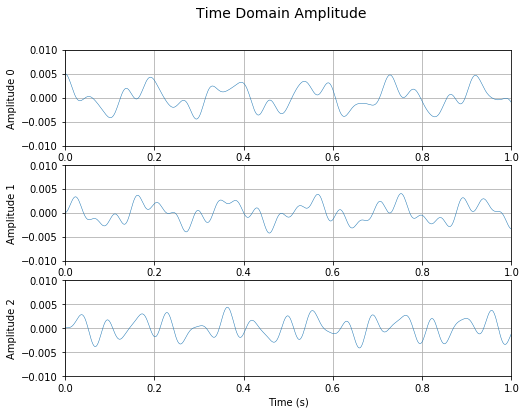

In [23]:
# Build the modal responses as harmonic functions with given properties
uk = MRPy.harmonic(NX=3, N=2048, fs=512, X0=u0i, f0=fk3, phi=thi)

# Calculate the NODAL responses superposing all modal responses
uN = MRPy(np.dot(Phi3, uk), fs=512)

f4 = uN.plot_time(4, figsize=(8,6), axis_t=(0, 1, -0.01, 0.01))


We can see that the system response contains all natural 3 system natural frequencies, as can be confirmed
by taking a look at the periodograms:


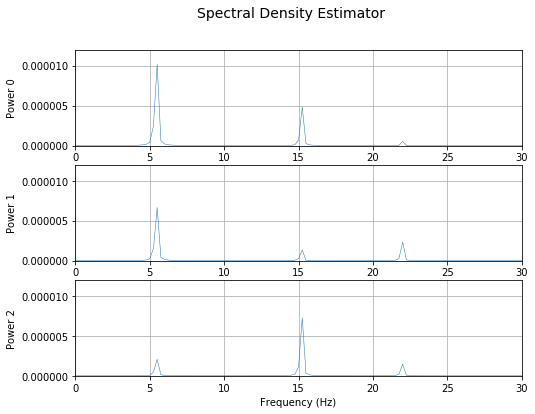

In [28]:
f5 = uN.plot_freq(5, figsize=(8,6), axis_f=(0, 30, 0.0, 1.2e-5))


## 4. Assignments <a name="section_4"></a> 



#### Appendix: Save all matrices to be used next class.

In [14]:
data = (wk1, Phi1, wk2, Phi2, wk3, Phi3)

with open('resources/data/sample_VM.pk', 'wb') as target:
    pk.dump(data, target)

with open('resources/data/sample_VM.pk','rb') as target:
    wk1, Phi1, wk2, Phi2, wk3, Phi3 = pk.load(target)
